In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

In [2]:


from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [7]:

IMAGE_SIZE = [224, 224]

train_path = 'Data/Train'
valid_path = 'Data/Test'


In [8]:


inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [9]:

for layer in inception.layers:
    layer.trainable = False

In [10]:

folders = glob('Data/Train/*')

In [11]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [13]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                             

In [14]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 300 images belonging to 12 classes.


In [17]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 36 images belonging to 12 classes.


In [18]:

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Dhiyanesh\AppData\Local\Temp\ipykernel_26752\2724883676.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
5/5 [==============================] - 13s 916ms/step - loss: 30.5262 - accuracy: 0.1133 - val_loss: 19.4851 - val_accuracy: 0.3333
Epoch 2/10
5/5 [==============================] - 3s 535ms/step - loss: 16.6068 - accuracy: 0.3300 - val_loss: 8.0174 - val_accuracy: 0.3889
Epoch 3/10
5/5 [==============================] - 3s 530ms/step - loss: 9.2483 - accuracy: 0.5067 - val_loss: 5.0550 - val_accuracy: 0.5278
Epoch 4/10
5/5 [==============================] - 3s 524ms/step - loss: 4.6908 - accuracy: 0.6700 - val_loss: 0.8743 - val_accuracy: 0.9167
Epoch 5/10
5/5 [==============================] - 3s 506ms/step - loss: 2.0309 - accuracy: 0.8000 - val_loss: 0.8978 - val_accuracy: 0.8611
Epoch 6/10
5/5 [==============================] - 3s 516ms/step - loss: 1.1622 - accuracy: 0.8733 - val_loss: 0.3121 - val_accuracy: 0.9722
Epoch 7/10
5/5 [==============================] - 3s 506ms/step - loss: 0.6936 - accuracy: 0.9167 - val_loss: 0.1347 - val_accuracy: 0.9722
Epoch 8/10
5/5 [

In [19]:
import matplotlib.pyplot as plt

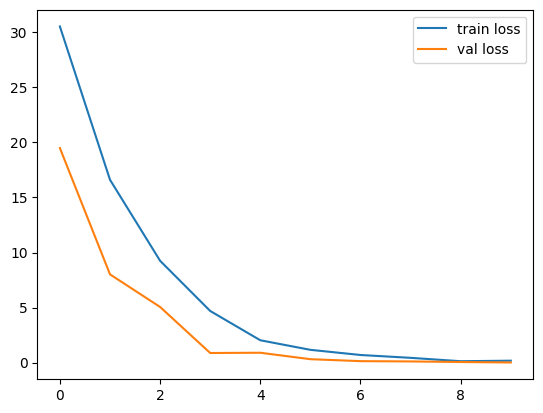

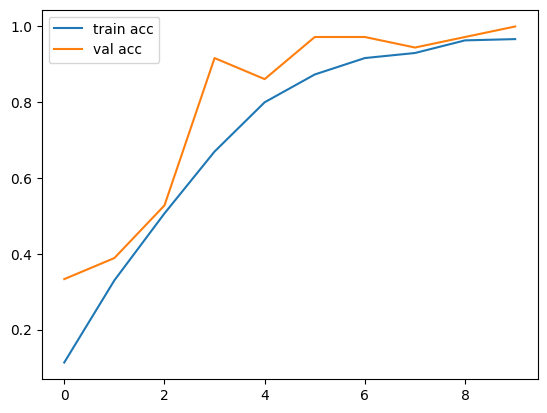

<Figure size 640x480 with 0 Axes>

In [20]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [22]:

y_pred = model.predict(test_set)


1/1 [==============================] - 1s 1s/step


In [23]:
y_pred

array([[1.43572685e-23, 3.67300047e-25, 4.36279556e-32, 5.70725039e-30,
        1.99409863e-32, 3.33337784e-32, 4.43255015e-16, 1.58571045e-23,
        1.00000000e+00, 1.32831353e-20, 5.67922563e-18, 4.35402994e-26],
       [8.22911046e-29, 2.56200480e-19, 6.02459583e-27, 1.00000000e+00,
        5.99338279e-17, 8.59097183e-21, 0.00000000e+00, 1.14529689e-34,
        0.00000000e+00, 5.18648444e-32, 1.04372422e-26, 2.51471523e-33],
       [1.45219085e-23, 3.96024814e-26, 3.28903515e-29, 1.26177830e-28,
        1.42724166e-37, 1.50954080e-35, 1.37026480e-12, 1.00000000e+00,
        1.60611947e-20, 7.43225902e-13, 4.92316513e-16, 1.40213083e-16],
       [7.30084457e-25, 1.05632980e-18, 1.84395409e-29, 1.82091484e-14,
        2.06278760e-26, 3.47539806e-29, 9.72639538e-11, 3.01612928e-13,
        1.85587748e-17, 1.00000000e+00, 4.88618607e-12, 4.37806474e-18],
       [2.20817457e-18, 1.00000000e+00, 1.33687404e-20, 9.54909962e-15,
        1.82366344e-11, 3.91393378e-17, 5.77791923e-30, 2.18

In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:
y_pred

array([ 8,  3,  7,  9,  1, 11,  7,  8,  2, 11, 10,  0,  4, 10,  7, 10,  6,
        5,  4,  6,  2,  3,  5,  4,  9,  6,  0,  8,  3, 11,  1,  5,  0,  9,
        1,  2], dtype=int64)

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:
model=load_model('model_inception.h5')

In [28]:
img=image.load_img('bq.JPG',target_size=(224,224))



In [29]:
x=image.img_to_array(img)
x

array([[[ 40.,  95.,  53.],
        [ 39.,  94.,  55.],
        [ 33.,  85.,  49.],
        ...,
        [ 25.,  82.,  47.],
        [ 30.,  88.,  50.],
        [ 31.,  89.,  51.]],

       [[168., 170., 156.],
        [164., 164., 154.],
        [180., 180., 172.],
        ...,
        [ 43.,  91.,  53.],
        [ 44.,  94.,  57.],
        [ 42.,  94.,  56.]],

       [[215., 208., 215.],
        [212., 205., 212.],
        [212., 205., 213.],
        ...,
        [151., 156., 136.],
        [145., 153., 132.],
        [142., 150., 129.]],

       ...,

       [[  7.,  41.,  14.],
        [  8.,  42.,  15.],
        [  8.,  42.,  15.],
        ...,
        [  6., 116.,  79.],
        [  7., 117.,  80.],
        [ 15., 125.,  88.]],

       [[  8.,  42.,  15.],
        [ 14.,  48.,  21.],
        [  9.,  43.,  16.],
        ...,
        [ 11., 123.,  85.],
        [ 12., 124.,  86.],
        [ 11., 121.,  84.]],

       [[  9.,  45.,  17.],
        [ 10.,  44.,  17.],
        [ 12.,  

In [30]:
x.shape

(224, 224, 3)

In [31]:
x=x/255

In [32]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [33]:
model.predict(img_data)

1/1 [==============================] - 1s 1s/step


array([[3.9231088e-02, 4.2647470e-02, 5.4844004e-01, 8.4745284e-04,
        1.2884967e-04, 7.1436830e-06, 3.0903568e-02, 4.0902891e-05,
        2.9366493e-01, 3.9114268e-04, 1.3219624e-02, 3.0477740e-02]],
      dtype=float32)

In [34]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 29ms/step


In [40]:
a

array([2], dtype=int64)